Hydration plot on phase 3b data
- classify based on USG: Dehydrated is defined as USG ≥1.020
- pre and passive only, across all visits 
- pick out the interested features: ['']
- Plot: 
    - Box plot: group by hydration status
    - Scatter Plot: USG (x-axis) vs. feature(y-axis) group by hydration status

In [2]:
import pandas as pd
import numpy

phase3b = pd.read_csv(r'Phase3b-Final-Data-Updated.csv')
print(phase3b.shape)

def hydration_status(row):
    if row < 1.02:
        return 'Hydrated'
    else:
        return 'Dehydrated'
phase3b['Hydration_Status'] = phase3b['USG'].apply(hydration_status)

# pre and passive only
phase3b = phase3b[(phase3b['MeasurType']=='Passive')|(phase3b['MeasurType']=='Pre')]
print(phase3b.shape)


C:\Users\09453022\AppData\Local\Temp\ipykernel_12168\1349572877.py:4: DtypeWarning: Columns (3,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  phase3b = pd.read_csv(r'Phase3b-Final-Data-Updated.csv')


(6863, 2265)
(6340, 2266)


C:\Users\09453022\AppData\Local\Temp\ipykernel_17884\3749753543.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Hydration_Status', y='HRV_SD1_DIV_SD2', data=phase3b, palette="Set3")


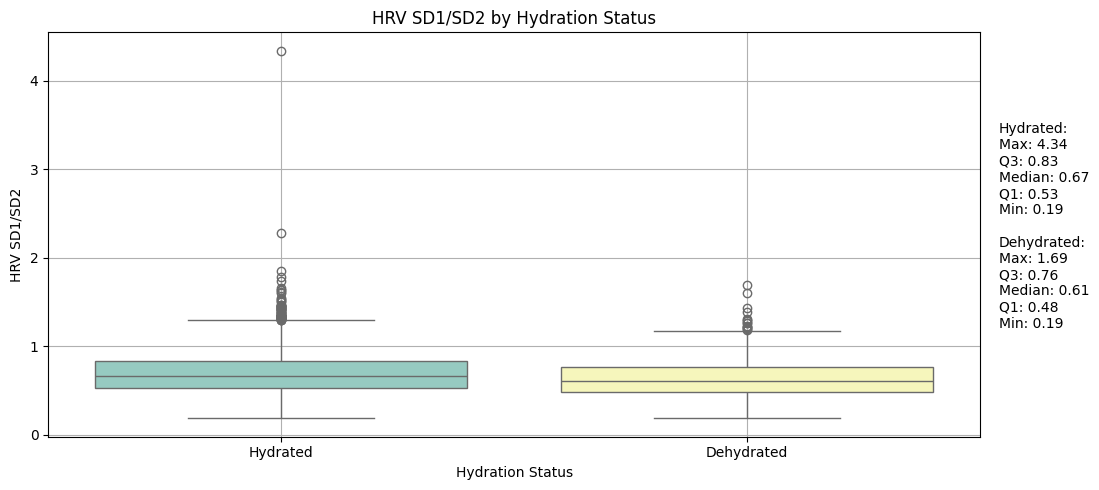

In [24]:
# box plot
# add the components: Max, Q3, Median, Q1, Min on the box plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Create the boxplot
ax = sns.boxplot(x='Hydration_Status', y='HRV_SD1_DIV_SD2', data=phase3b, palette="Set3")

# Calculate the components (Max, Q3, Median, Q1, Min) and add them as a side legend
legend_text = []
for group in phase3b['Hydration_Status'].unique():
    group_data = phase3b[phase3b['Hydration_Status'] == group]['HRV_SD1_DIV_SD2']
    max_val = group_data.max()
    q3 = group_data.quantile(0.75)
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    min_val = group_data.min()
    
    # Append the values to the legend text
    legend_text.append(f"{group}:\nMax: {max_val:.2f}\nQ3: {q3:.2f}\nMedian: {median:.2f}\nQ1: {q1:.2f}\nMin: {min_val:.2f}\n")

# Add the legend text to the plot
plt.gcf().text(1.02, 0.5, "\n".join(legend_text), fontsize=10, va='center', transform=plt.gca().transAxes)

# Add title and labels
plt.title('HRV SD1/SD2 by Hydration Status')
plt.xlabel('Hydration Status')
plt.ylabel('HRV SD1/SD2')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

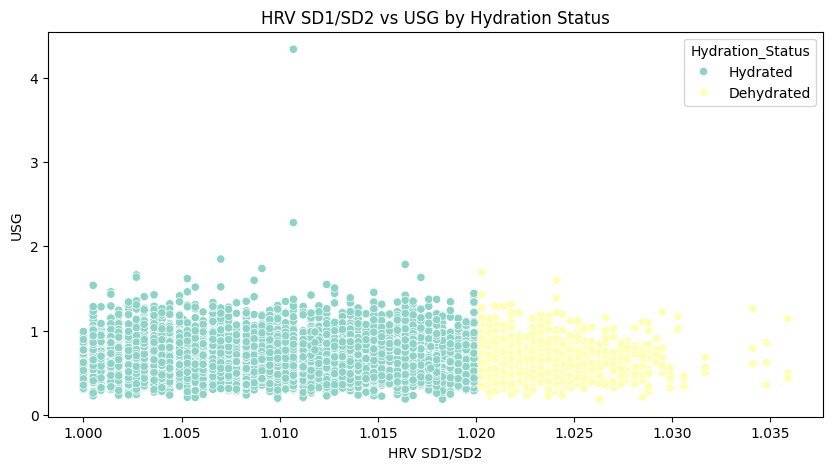

In [16]:
# scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='USG', y='HRV_SD1_DIV_SD2', hue='Hydration_Status', data=phase3b, palette="Set3")
plt.title('HRV SD1/SD2 vs USG by Hydration Status')
plt.xlabel('HRV SD1/SD2')
plt.ylabel('USG')
#plt.savefig('HRV_SD1_DIV_SD2_vs_USG_by_Hydration_Status.png')
plt.show()

Text(0.5, 1.0, 'Thirst Rating Distribution in All Pre and Passive Data')

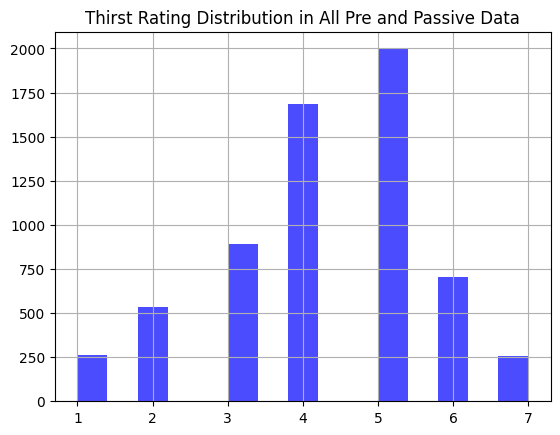

In [88]:
phase3b['ThristRating'].hist(bins=15, color='blue', alpha=0.7)
plt.title('Thirst Rating Distribution in All Pre and Passive Data')

In [ ]:
# category frequency distributions: proportion table for each class
phase3b.groupby('Hydration_Status')['ThristRating'].value_counts(normalize=True).unstack()

ThristRating,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Hydration_Status,,,,,,,
Dehydrated,0.013739,0.044161,0.047105,0.162905,0.320903,0.290481,0.120707
Hydrated,0.046696,0.092450,0.158539,0.286010,0.314065,0.076633,0.025607


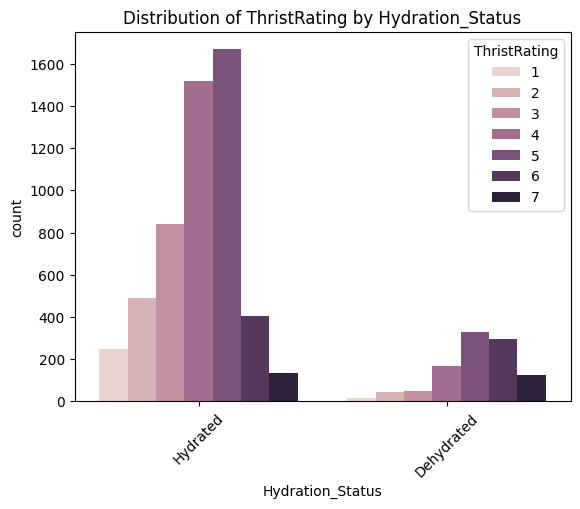

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=phase3b, x='Hydration_Status', hue='ThristRating')
plt.xticks(rotation=45)
plt.title("Distribution of ThristRating by Hydration_Status")
plt.show()

In [70]:
# return statistics as a table format
# the group name, the number of rows, the mean, the standard deviation, Standard Error of the Mean (SEM), lower 95% confidence interval (CI) and upper 95% CI separately for each group
def get_stats(df, group_col, value_col):
    stats = df.groupby(group_col)[value_col].agg(['count', 'mean', 'std'])
    # rename the columns
    stats = stats.rename(columns={'count': 'Number', 'mean': 'Mean', 'std': 'Std Dev'})
    stats['STD Err Mean'] = stats['Std Dev'] / numpy.sqrt(stats['Number'])
    stats['Lower 95%'] = stats['Mean'] - 1.96 * stats['STD Err Mean']
    stats['Upper 95%'] = stats['Mean'] + 1.96 * stats['STD Err Mean']
    return stats.reset_index()

# get the statistics for HRV_SD1_DIV_SD2 by Hydration_Status
stats = get_stats(phase3b, 'Hydration_Status', 'BR_CONFIDENCE')
stats

,Hydration_Status,Number,Mean,Std Dev,STD Err Mean,Lower 95%,Upper 95%
0,Dehydrated,1019,76.515634,26.381040,0.826428,74.895835,78.135432
1,Hydrated,5321,78.175522,25.972593,0.356056,77.477652,78.873392


C:\Users\09453022\AppData\Local\Temp\ipykernel_17884\1592381742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Hydration_Status', y=feature, data=phase3b, palette="Set3")


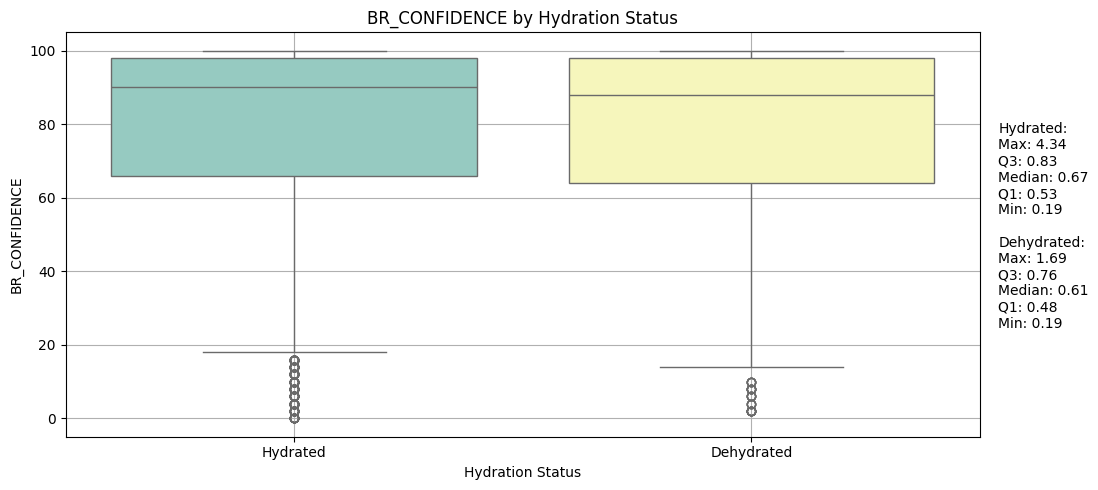

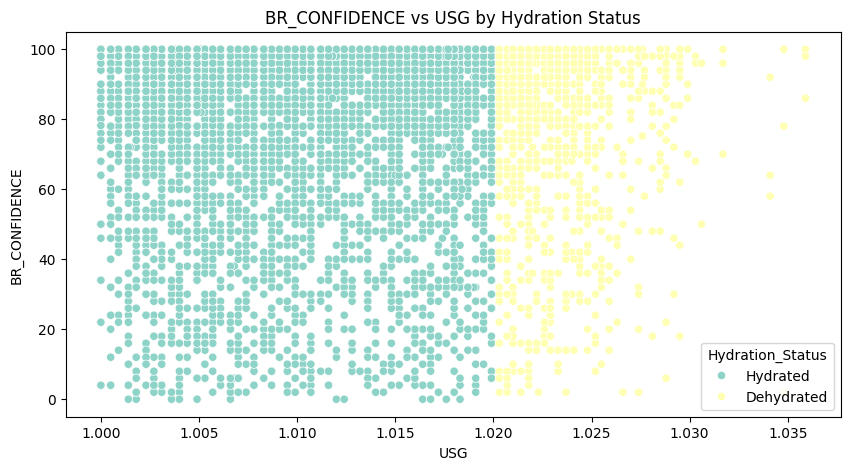

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# for loop on interested features
# ['HRV_SD1_DIV_SD2', 'Height', 'AGE_PHYSIOLOGICAL', 'ThirstRating_6.0', 'BP_RPP', 'AGE_DERMATOLOGICAL', 'Age', 'BMI_CALC', 'BP_STD_PENALIZE_HPT', 'BP_SQI', 'TG_RISK_PROB', 'HDLTC_RISK_PROB', 'MFBG_RISK_PROB',
# 'HRV_HF', 'HRV_ALPHA1', 'HRV_PEAK_HF', 'HRV_PEAK_HF_AR', 'ABSI', 'BP_HEART_ATTACK', 'BR_CONFIDENCE']
features = ['BR_CONFIDENCE']
for feature in features:

    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(x='Hydration_Status', y=feature, data=phase3b, palette="Set3")
    legend_text = []
    for group in phase3b['Hydration_Status'].unique():
        group_data = phase3b[phase3b['Hydration_Status'] == group]['HRV_SD1_DIV_SD2']
        max_val = group_data.max()
        q3 = group_data.quantile(0.75)
        median = group_data.median()
        q1 = group_data.quantile(0.25)
        min_val = group_data.min()
        legend_text.append(f"{group}:\nMax: {max_val:.2f}\nQ3: {q3:.2f}\nMedian: {median:.2f}\nQ1: {q1:.2f}\nMin: {min_val:.2f}\n")
    
    plt.gcf().text(1.02, 0.5, "\n".join(legend_text), fontsize=10, va='center', transform=plt.gca().transAxes)

    plt.title(f'{feature} by Hydration Status')
    plt.xlabel('Hydration Status')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='USG', y=feature, hue='Hydration_Status', data=phase3b, palette="Set3")
    plt.title(f'{feature} vs USG by Hydration Status')
    plt.xlabel('USG')
    plt.ylabel(feature)
    plt.show()